## Probability Distribution


Load the exam.csv dataset into a DataFrame and perform the following tasks on the “math score,” ”readingscore,” and “writing score” columns:

1.Plot the distributions using the seabornlibrary

2.Find the mean and standard deviation using the scipylibrary

3.Find skewness and kurtosisusing thestatsmodule from the scipylibrary

4.Find Standard Normal Distribution(z-score) using the statsmodule from the scipylibrary5.Plot the Z distribution using the seabornlibraryDataset:


## Sampling Distribution

A wine can be labeled as quality "7" and above only if the alcohol level is greater than 11.3%. If the level of alcohol is high, then the will taste sour enough; if the alcohol level is less than 11.3%, the wine might taste bitter. The quality controlperson is only allowed to open ten bottles froma batch of wine with quality "7" & "8"to ensure the levels are sufficient.

Load  the “winequality-red.csv”data  into  a  DataFrame  and Perform  following tasks:

1.Pick   up   a   sample   of   ten   bottles   from   "7"   and   "8"   quality   using numpy.random()function

2.Find out the mean and standard deviation of the sample

3.Plot the alcohol content available in the sample using a distplot

4.Calculate   the   standard   error   using   formula -standard_error  = s/np.sqrt(n), Where,s  =  standard  deviation  of  the  sample,  and  n  = sample size

In [84]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [100]:
arr1 = df[(df["quality"] == 7)|(df['quality'] == 8)]["quality"]
arr1

7       7
8       7
16      7
37      7
62      7
       ..
1541    7
1544    7
1549    8
1555    7
1584    7
Name: quality, Length: 217, dtype: int64

In [102]:
sample=np.random.choice(arr1,size=10)
sample

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 8], dtype=int64)

In [103]:
sample.mean()

7.1

In [112]:
import numpy as np
s = np.std(sample)
s

0.3

<AxesSubplot:ylabel='Count'>

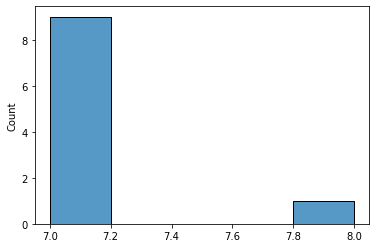

In [111]:
import seaborn as sns
sns.histplot(sample)

In [113]:
standard_error = s/np.sqrt(10)

In [114]:
standard_error

0.09486832980505137

Note:This problem is in continuation with the previous one.

Our goal was to get a mean of 11.3, but we got 11.65 for our samples. Since this is a sample and we do not expect it to be precisely 11.3, it is 11.65. Does this batch  of  the  sample  accurately  reflect  the  alcohol  content  of  the  entire population? To answer these questions, perform the following tasks:

1.Take nine samples of size ten each from the population and find the means and standard deviations of all the nine samples

2.Plot the means of the sampling distribution

3.Find the standard error of the sampling distribution

In [117]:
l_mean=[]
l_std=[]
for i in range(9):
  sample=np.random.choice(df['alcohol'],10)
  l_mean.append(sample.mean())
  l_std.append(sample.std())
l_mean,l_std

([10.84,
  10.285,
  10.95,
  10.690000000000001,
  10.08,
  10.46,
  9.959999999999999,
  9.69,
  10.83],
 [1.3192422067232388,
  0.8994581702336133,
  1.1638298844762491,
  0.9596353474106711,
  0.49959983987187195,
  1.1244554237496478,
  0.5314132102234569,
  0.41097445176069025,
  0.9423905772024675])

<AxesSubplot:ylabel='Count'>

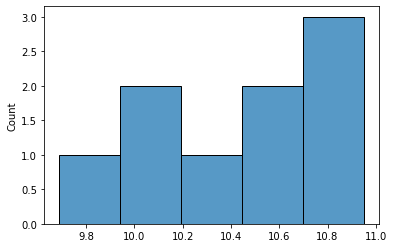

In [119]:
sns.histplot(l_mean)

In [121]:
final_std=np.array(l_std).std()
final_std

0.3035965066903435

In [122]:
error=final_std/np.sqrt(9)
error

0.10119883556344783

## Inferential Statistics

Load the wine dataset using the Sklearn library to a DataFrame and perform the following tasks:

1.Covert the datasetinto DataFrame using pandas

2.Generate asample size of 50and givea randomstate as 100

3.Calculate Z-critical, Margin of Error & Confidence Interval for alcohol ata 95% significance interval on generated sample data

In [34]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
wine = load_wine()
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df["target"] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [35]:
sample = df.sample(n=50,random_state=100)
sample.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2


In [36]:
# Sample mean target
sample_mean = sample.target.mean()
sample_mean

1.18

In [37]:
# Z critical
from scipy import stats
z_critical = stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [38]:
#Population std
pop_std = np.std(df.target)
pop_std

0.7728548591122252

In [39]:
# Margin of error
moe  = z_critical*(pop_std/np.sqrt(100))
moe

0.1514767689136739

In [40]:
#Confidence Interval
(sample_mean-moe),(sample_mean+moe)

(1.028523231086326, 1.331476768913674)

## Statistical Hypothesis Testing

A  Tyre  manufacturing  company  claims  that  their  original  Tyres  run  for  about 50,000 km before replacing them. A random sample of 100 tyres was taken, and it turned out that the average life of the sample was about 48,000 Km.To find out whether the company said the truth or lie, based on standard deviations as 1500.

H0:u  =  Tyres  run  for  about  50,000  km  before  having  to  replace  them  (Null hypothesis)

H1:  u  =  Tyres  can’t  run  for  about  50,000  km  before  having  to  replace them(Alternate hypothesis)

In [41]:
# Given
n=100
sample_mean=48000
pstd=1500
p_mean=50000

In [46]:
# Hypothesis
1.Null Hypothesis (The average life of the tyres is 50000 km (p_mean=50000)
2.Alternate Hypothesis (The average life of the tyres is not 50000 km (p_mean!=50000)

In [43]:
#95% confidence interval
moe = z_critical*(pstd/np.sqrt(100))
moe  # Margin of error

293.9945976810081

In [44]:
lower_bound = (sample_mean-moe)
upper_bound = (sample_mean+moe)
(lower_bound,upper_bound)

(47706.005402318995, 48293.994597681005)

In [45]:
if p_mean>lower_bound and p_mean<upper_bound:
    print("Accepted")
else:
    print("Rejected")

Rejected


### Problem 2:

A company  claims  that  its  employees  earn  approximately  5LPA  on  average.  A random sample of 50 employees was taken, and it turned out to have a mean of 2 LPA. Perform hypothesis testing for the given claim having a population mean of 5 LPA with a standard deviation of 3.

H0:u(Null hypothesis)  = Employees are earning on an average around 5LPA 

H1:u(Alternate hypothesis)= Employees are not earning 5LPA on an averageSample Input:Sample Output:


In [33]:
# Given
p_mean=5
n=50
sample_mean=2
pstd=3

In [34]:
# 95% confidence interval
moe = z_critical*(pstd/np.sqrt(50))
moe

0.8315422946098067

In [35]:
lower_bound = (sample_mean-moe)
upper_bound = (sample_mean+moe)
(lower_bound,upper_bound)

(1.1684577053901934, 2.8315422946098066)

In [47]:
if p_mean>lower_bound and p_mean<upper_bound:
    print("Accepted")
else:
    print("Rejected")

Rejected


## Chi-Square Test

The “titanic.csv”dataset has details of passengers on board the Titanic when it met  its  fate  in  1912. Your  job  is  tocompare  how  Passenger  class  affects  the probability of survival withthe help ofthe Chi-Square test.Load the“titanic.csv“ data into a DataFrame and perform the following tasks:

1.Create   a   DataFrame   with   three   columns   from   the   original   dataset –"PassengerID," "PClass," "Survived or not"

2.Visualize the "PClass"and the "Survived or not"columns to get an overview of the columns

3.Plotthe correlation  between  passenger  class  and  chances  of  survival  and calculatethe survival rate for each class

4.State Null hypothesis based on the class-wise survival rate

5.Plot  the  difference  between  expected  and  observed  correlations  between passenger class and survival using heat maps to decide if there is a need for a Chi-Square Test

6.Calculate Chi-Square and P –Values for each passenger class and the entire distribution7.Accept or reject the Null hypothesis based on the results obtained 


In [53]:
df = pd.read_csv("titanic.csv")
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893.0,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894.0,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895.0,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896.0,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306.0,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307.0,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308.0,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
selected_columns = ['Unnamed: 0', 'Pclass', 'Survived']
new_df= df[selected_columns]
new_df.rename(columns={'Unnamed: 0':"PassengerID"})

,PassengerID,Pclass,Survived
0,NaN,3,0
1,893.0,3,1
2,894.0,2,0
3,895.0,3,0
4,896.0,3,1
...,...,...,...
413,1305.0,3,0
414,1306.0,1,1
415,1307.0,3,0
416,1308.0,3,0


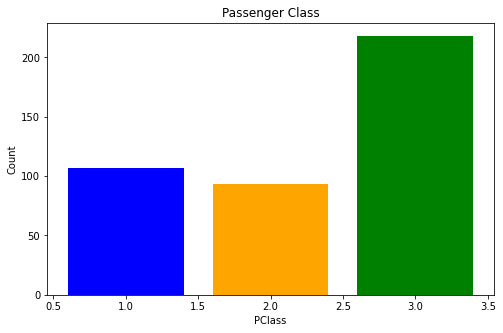

In [55]:
import matplotlib.pyplot as plt
pclass_counts = new_df['Pclass'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(pclass_counts.index,pclass_counts,color=['green','blue','orange'])
plt.xlabel("PClass")
plt.ylabel("Count")
plt.title("Passenger Class")
plt.show()

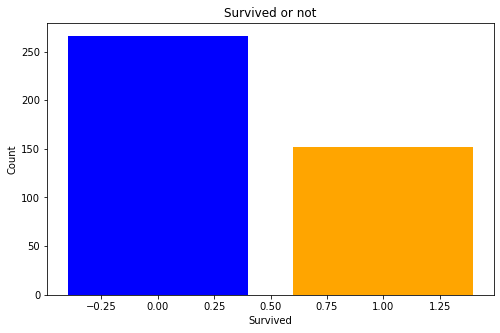

In [56]:
survive_counts=new_df["Survived"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(survive_counts.index,survive_counts,color=["blue","orange"])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived or not")
plt.show()

In [64]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
survival_rate_by_class

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [65]:
null_hypo="survived and pclass are non related"
alt_hypo="survived and pclass are related"

In [67]:
data = pd.crosstab(new_df['Pclass'],new_df['Survived'])
data

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


In [69]:
from scipy.stats import chi2,chisquare
alpha=0.05
p=1-alpha/2
dof=(3-1)*(2-1)  
cric = chi2.ppf(p,dof)
cric

7.377758908227871

In [71]:
from scipy.stats import chi2_contingency
stat,p_value,dof,exp = chi2_contingency(data)
stat

6.693869422819262

In [72]:
exp

array([[ 68.09090909,  38.90909091],
       [ 59.18181818,  33.81818182],
       [138.72727273,  79.27272727]])

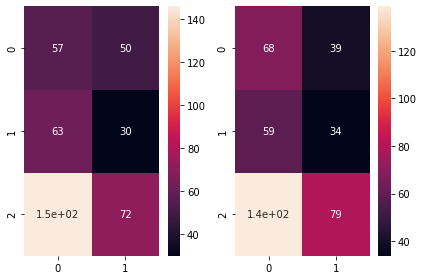

In [77]:
import seaborn as sns
plt.subplot(1,2,1)
sns.heatmap(data.values,annot=True)
plt.subplot(1,2,2)
sns.heatmap(exp,annot=True)
plt.tight_layout()
plt.show()

In [78]:
p_value

0.03519206276590605

In [80]:
stat

6.693869422819262

In [ ]:
##outputs for reference
#2.

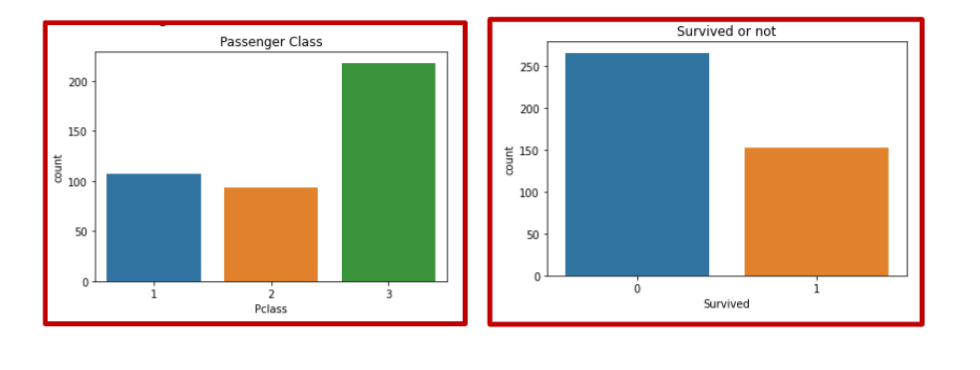

#3

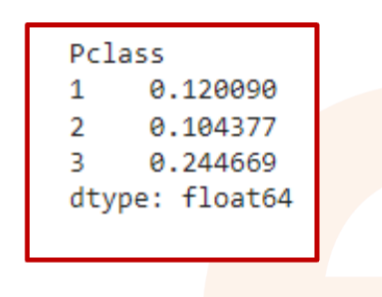

#4
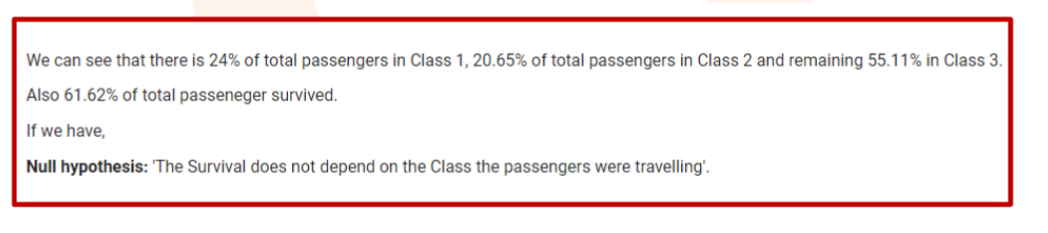

#5
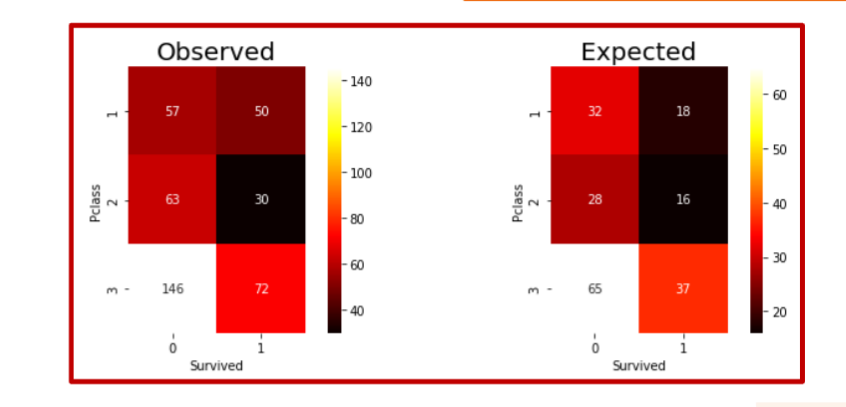

$5
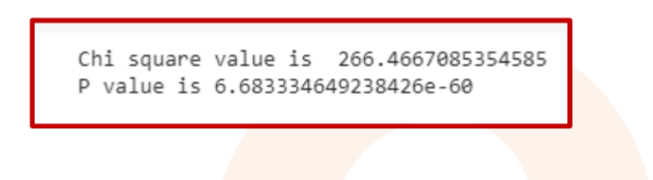